In [1]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, arctan2, exp
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.io import wavfile, loadmat               
from IPython.display import Video, Audio


%matplotlib ipympl

<img src="Figurer/NTNU_Logo.png" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Sampling and Aliasing

* **Course AIS2201 - Signal Processing**
* **Uke 35, 2024**
* **Lecturer: Kai Erik Hoff**



## Tema

* Intro/sampling recap
* Sampling and normalized frequencies
* Intro to Aliasing
* Nyquist Sampling Theorem
* Sampling and the signal spectrum


# Sampling Recap:

<img src="Figurer/01_Introduksjon/Fig9_Ts.png" style="width: 80%; margin-left: 100px" />


# Sampling frequency and sampling period

* **Sampling frequency:**
    - Number of samples taken per second ($f_s$)
* **Samplingsperiode:**
    - Time interval between samples ($T_s$)
    $$T_s = \frac{1}{f_s}$$
* Relation between time and sample number:
$$t_n = n\cdot T_s = \frac{n}{f_s}$$
$$n = \frac{t_n}{T_s} = t_n\cdot f_s$$
* Ideal sampling expressed mathematically:
$$x[n] = x(t)|_{t = n\cdot T_s}$$

# Ideal sampling

* Samples of the analog signal $x(t)$ are taken without error at the precise moment $t=n\cdot T_s$.

<img src="Figurer/05_Sampling_og_Aliasing/Fig4_IdealSampling.png" style="width: 60%; margin-left: 100px">
     
* _More on non-ideal sampling later._

# Sampling sinusoids

* We can find an expression for the discrete sinusoid.

\begin{align}
x(t) &= \cos(2\pi f \cdot t + \phi) \\
x[n] &= x(t)|_{t=n\cdot T_s} \\
&= \cos(2\pi f\cdot nT_s +\phi)\\
&= \cos\left(2\pi \frac{f}{f_s}\cdot n + \phi\right)
\end{align}



* ***Normalized Frequency***
    - alternatively *Digital Frequency*
$$\begin{align}
\hat{f} &= \frac{f}{f_s}\\
\hat{\omega} &= 2\pi \frac{f}{f_s}
\end{align}$$

* Number of cycles per second "no longer relevant".
* For digital signals the we measure frequency in *cycles per sample*

* PS. The book does not have a separate notation for normalized frequency, using omega ($\omega$) for "radians per second" **and** "radians per sample". Using the $\hat{\ \ }$ notation is a personal preference from the lecturer to improve clarity.

# Sampling a sine wave

* Frequency spectrum for the signal $x(t) = \cos(100\pi \cdot t)$ sampled with two separate sampling frequencies.

<img src="Figurer/05_Sampling_og_Aliasing/Fig5_SampledSinusoids.png" style="width: 60%; margin-left: 100px">


## Example 1:
* Et sinusformet signal $x(t)$ med frekvens $f=144Hz$, amplitude $A = 4V$ og fase $\theta = \frac{\pi}{3}$ samples av en A/D omformer med samplingsfrekvens $f_s = 800Hz$. 
    - Hva blir funksjonsuttrykket for det samplede signalet $x[n]$?
    - Hva er den normaliserte vinkelfrekvensen $\hat{\omega}$?

# [Youtube-Video](https://youtu.be/yr3ngmRuGUc)

* The video illustrates an important problem which may arise during discretization: ***Aliasing***
* To gain a better idea of what's going on, we can study what happens when sampling a simple signal: a sine wave.
* For å få en bedre idé av hva som skjer her, er det nyttig å se på hva som skjer når vi sampler en enkel type signal: en sinusbølge.

## Interaktivt plot: sampling av sinussignal

Output()

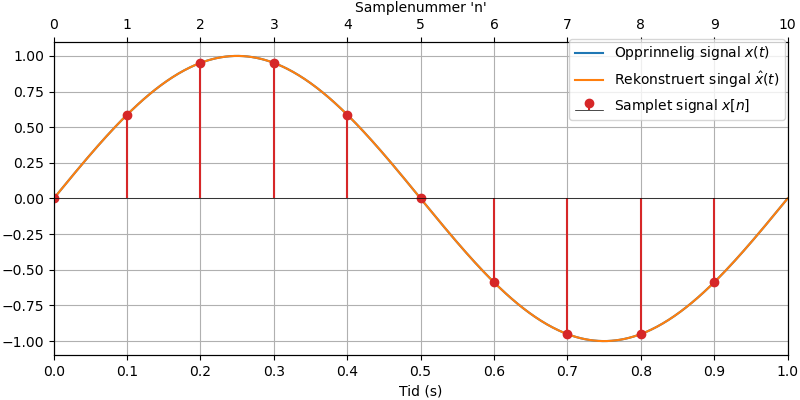

In [2]:
from Kildekode._05_Aliasing import aliasingDemo
%matplotlib ipympl
aliasingDemo(fig_num=1);

# Utfordringen med sampling

* Vi kan bare estimere hva signalverdien er imellom samplingstidspunkt.

<img src="Figurer/05_Sampling_og_Aliasing/Fig6_SamplingChallenge.png" style="width: 60%; margin-left: 100px">

<img src="Figurer/05_Sampling_og_Aliasing/Fig7_EKG_Eksempel.gif" style="width: 100%">


## Hva skal til for vellykket rekonstruksjon av samplet signal?

* Med utgangspunkt i sinusbølger kan man formulere et kriterkie for vellykket rekonstruksjon:

    1. Alle signal kan dekomponeres til en sum av sinusbølger.
    2. Dersom vi kan rekonstruere alle sinusbølgene individuelt, bør rekonstruksjon av et mer komplisert signal være mulig.


* Hvilke begrensninger har vi for sampling av sinussignal?

# Aliasing

* Når en sinusformet bølge med frekvens $f$ samples med samplingsfrekvens $f_s \leq 2\cdot f$, vil samplene "se ut" som et annet signal.
* Dette falske signalet er kjent som en alias.
* En alias av et signalkomponent er ofte umulig å adskille fra de delene av signalet som er samplet korrekt.

# Nyquist Samplingsteorem

* Et analogt signal $x(t)$ som ikke inneholder frekvenskomponenter høyere enn $f_{max}$ kan rekonstrueres uten feil fra det samplede signalet $x[n] = x(n\cdot T_s)$ *kun* hvis samplingsfrekvensen $f_s =\frac{1}{T_s}$ er større enn $2\cdot f_{max}$.

## $$f_s > 2\cdot f_{max} = \text{Nyquist rate}$$

* Maksfrekvensen $\frac{f_s}{2}$ er kjent som *Nyquist Frekvensen*

# Normalisert vinkelfrekvens og samplingsteoremet

* Aliasing ved sampling av sinusbølge forekommer når $f \geq \frac{f_s}{2}$. 
    * Denne "maksfrekvensen" tilsvarer normalisert vinkelfrekvens $\hat{\omega} = 2\pi \frac{f}{f_s}|_{f=\frac{f_s}{2}}= \pi$
* Når man betrakter sinusbølger som en sum av komplekse eksponentialer definerer dette et begrenset frekvensområde i det tosidige frekvensspekteret der aliasing ikke vil forekomme.

$$-\pi < \hat{\omega} < \pi$$

# Kvadratursignal og Aliasing



Output()

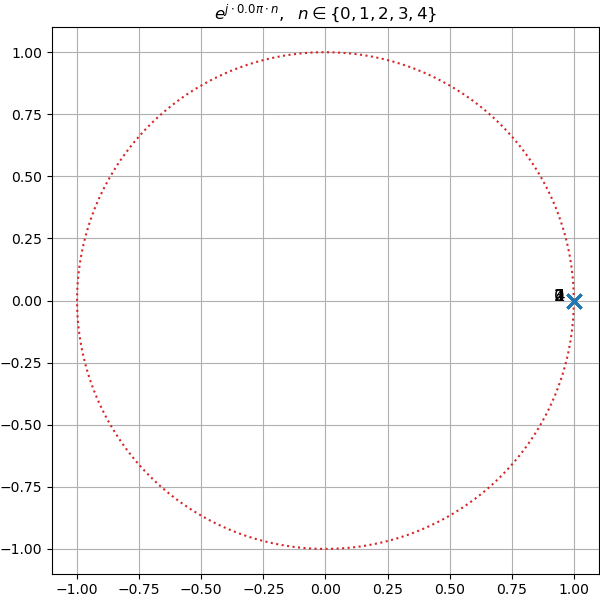

In [3]:
from Kildekode._05_Aliasing import complexAlias
complexAlias(fig_num=2)

# Utregning av alias for en sinusbølge

* Alle normaliserte vinkelfrekvenser utenfor intervallet $-\pi < \hat{\omega} < \pi$ vil ha en alias *i* frekvensintervallet $-\pi < \hat{\omega} < \pi$.<br><br>
$$ \hat{\omega} = k\cdot 2\pi + \hat{\omega}_{alias}$$
    - der $k$ er et heltall, og $\hat{\omega}_{alias}$ er alias-frekvensen i rad/sample.


* Eksempel:
    - En vinkelfrekvens $\hat{\omega}=\frac{7\pi}{5}$ for et diskrét komplekst eksponential $x[n] = e^{j\hat{\omega}\cdot n}$ påfører altså $\frac{7\pi}{5}$ radianer rotasjon mellom hvar sample. 
    - En annen vinkelfrekvens $\hat{\omega}=-\frac{3\pi}{5}$ vil gi ***nøyaktig*** de samme sampleverdiene.

## Regneeksempel 2: 
* Hva blir det rekonstruerte signalet $\hat{x}(t)$ når et sinusformet signal $x(t) = \cos\left(2\pi \cdot 475 \cdot t + \frac{\pi}{3} \right)$ samples med samplingsfrekvens $f_s = 300Hz$?

Text(0.5, 1.0, 'Plot for regneeksempel 2')

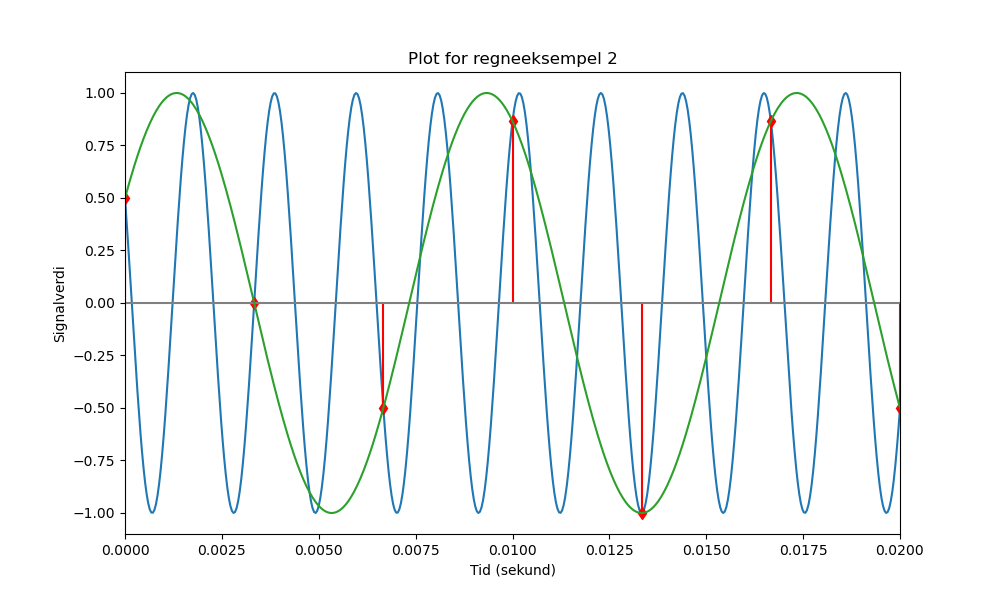

In [4]:
# Python-kode for regneeksempel 2
fs = 300 # Hz

# Signal parameters x(t) = A*cos(2*pi*f*t+phi)
f = 475 # Hz
phi = pi/3 # Radianer
A = 1 # Volt 

# Simulate analog signal x(t)
time_window = 0.02 # seconds
t = np.linspace(0, time_window, 501)
x_t = A*cos(2*pi*f*t + phi) 

# Generate signal samples x[n]
n = np.arange(0, int(time_window*fs)+1)
x_n = A*cos(2*pi*f/fs*n + phi)

# Alias
x_a = A*cos(2*pi*(f-2*fs)*t + phi) 

plt.close(3); plt.figure(3, figsize=(10, 6))
plt.plot(t, x_t, "tab:blue", label=r"$x(t)$")
plt.stem(n/fs, x_n, basefmt='gray', markerfmt="rd", linefmt="r", label=r"$x[n]$")
plt.plot(t, x_a, "tab:green", label=r"$\hat{x}(t)$")
plt.xlim([t[0], t[-1]])
plt.xlabel("Tid (sekund)")
plt.ylabel("Signalverdi")
plt.title("Plot for regneeksempel 2")

# Kodeillustrasjon: chirp-signal

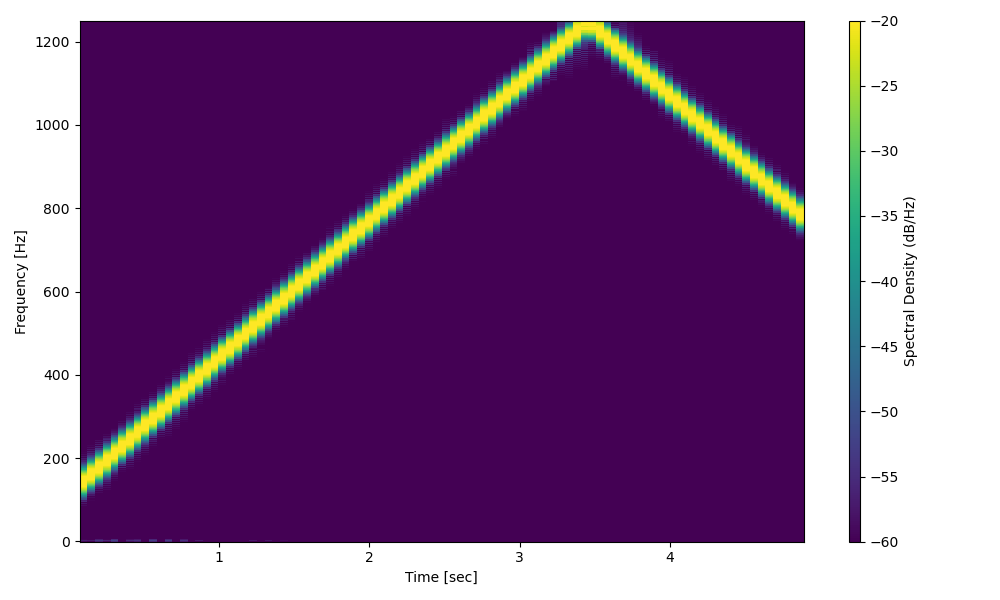

In [5]:
fs = 2500 # Samplet per second
T = 5 # Signalvarighet i seconds
t = np.linspace(0, T, int(T*fs), endpoint=False) # array of sample time values
x_t = sig.chirp(t, f0 = 110, t1=T, f1 = 1760)    # Lag en tone som gradvis øker i frekvens

# Her genereres og vises et spektrogram basert på det genererte chirp-signalet.
# Vi skal snakke om alle du forskjellige parametrene om et par uker, så ikke
# bli forskrekket om det ser helt gresk ut.
plt.close(4); plt.figure(4, figsize=(10,6))

f_axis, t_axis, Sxx = sig.spectrogram(x_t, fs,'hamming', 512, 384, 2048)
plt.pcolormesh(t_axis, f_axis, 10*np.log10(Sxx), vmax =-20, vmin = -60, shading='auto')
plt.colorbar(aspect=50, label=r'Spectral Density (dB/Hz)')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout();plt.show()

Audio(x_t/max(abs(x_t))/16, rate=fs, normalize=False) # Spill av "x_t" til en Audio widget

<img src="Figurer/05_Sampling_og_Aliasing/Fig14_FreqFolding1.png" style="width: 100%">

# Spørsmål?